# Project: Seattle Airbnb

> For this project, you will pick a dataset. Inspired by Robert, there are a few public datasets from AirBnB available below, but you may also choose a dataset similar to what was used in the lessons, or an entirely different dataset. Using your dataset, you will choose 3 questions you aspire to answer from the data.

I chose Airbnb data in Seattle, and have the following three questions:

- What is the seasonal pattern of Airbnb in Seattle?

- What kinds of airbnb homes are popular?

- What are the most influencial features about the rental price?

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load data
cal = pd.read_csv('D:/OneDrive/Study/MOOC/Udacity/Data_Scientist/DSND_Term2/04Seattle_Airbnb/data/calendar.csv')
lst = pd.read_csv('D:/OneDrive/Study/MOOC/Udacity/Data_Scientist/DSND_Term2/04Seattle_Airbnb/data/listings.csv')
rev = pd.read_csv('D:/OneDrive/Study/MOOC/Udacity/Data_Scientist/DSND_Term2/04Seattle_Airbnb/data/reviews.csv')

## Data understanding

In [3]:
cal.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [4]:
cal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
listing_id    1393570 non-null int64
date          1393570 non-null object
available     1393570 non-null object
price         934542 non-null object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [5]:
lst.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [6]:
lst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
id                                  3818 non-null int64
listing_url                         3818 non-null object
scrape_id                           3818 non-null int64
last_scraped                        3818 non-null object
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
experiences_offered                 3818 non-null object
neighborhood_overview               2786 non-null object
notes                               2212 non-null object
transit                             2884 non-null object
thumbnail_url                       3498 non-null object
medium_url                          3498 non-null object
picture_url                         3818 non-null object
xl_picture_url                      3498

In [7]:
rev.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [8]:
rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
listing_id       84849 non-null int64
id               84849 non-null int64
date             84849 non-null object
reviewer_id      84849 non-null int64
reviewer_name    84849 non-null object
comments         84831 non-null object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


## Seasonal pattern 

What is the seasonal pattern of Airbnb in Seattle?

In [9]:
# import libraries to plot time series
from datetime import datetime
import matplotlib.dates as mdates
from scipy.ndimage.filters import gaussian_filter1d

In [10]:
# define a function to plot daily data
def timeplot(data, feat, title):
    
    plt.figure(figsize=(20,8))
    
    x = [datetime.strptime(date, '%Y-%m-%d') for date in data.index]
    y = data[feat]
    y_smooth = gaussian_filter1d(y, sigma=5)
    
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.title(title)
    
    plt.plot(x, y_smooth, 'c-')
    plt.show()

### Seasonal Booking

In [11]:
cal['available'].value_counts()

t    934542
f    459028
Name: available, dtype: int64

In [12]:
# convert 'available' into binary
cal['available'] = cal['available'].map(lambda available: 1 if available == 't' else 0)

In [13]:
# check
cal['available'].value_counts()

1    934542
0    459028
Name: available, dtype: int64

In [14]:
ocp = cal[['date', 'available']].groupby('date').mean()
ocp['occupancy'] = 1 - ocp['available']

In [15]:
ocp.head()

,available,occupancy
date,,
2016-01-04,0.454426,0.545574
2016-01-05,0.488999,0.511001
2016-01-06,0.478261,0.521739
2016-01-07,0.465165,0.534835
2016-01-08,0.466737,0.533263


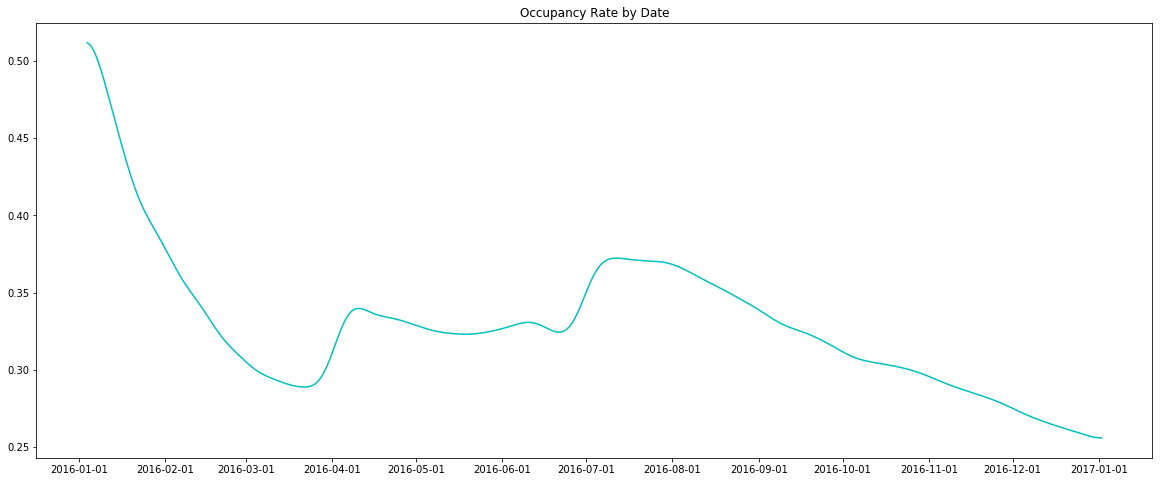

In [16]:
timeplot(ocp, 'occupancy', 'Occupancy Rate by Date')

The highest occupancy rate is in January 2016, and decreasing rapidly from 50% to 30% in 2 months. Then, it goes up slightly in the start of April and in the start of July seprately. After that, it declines continously.

It seems that spring and summer are the busy season. The best weather in Seattle is from late June to early September. And, in fact, there is a peak during that time.

However, it is weired to see the ighest occupancy rate is in January 2016. It might be becuase any festivals. Or did the hotels change their price strategy to become more competive? I don't know why.

### Seasonal Rental Price

In [17]:
# convert 'price' into float
cal['price'] = cal['price'].map(lambda price: float(price[1:].replace(',', '')), na_action='ignore')

#### Median of Price

In [18]:
pri_median = cal[['date', 'price']].groupby('date').median()

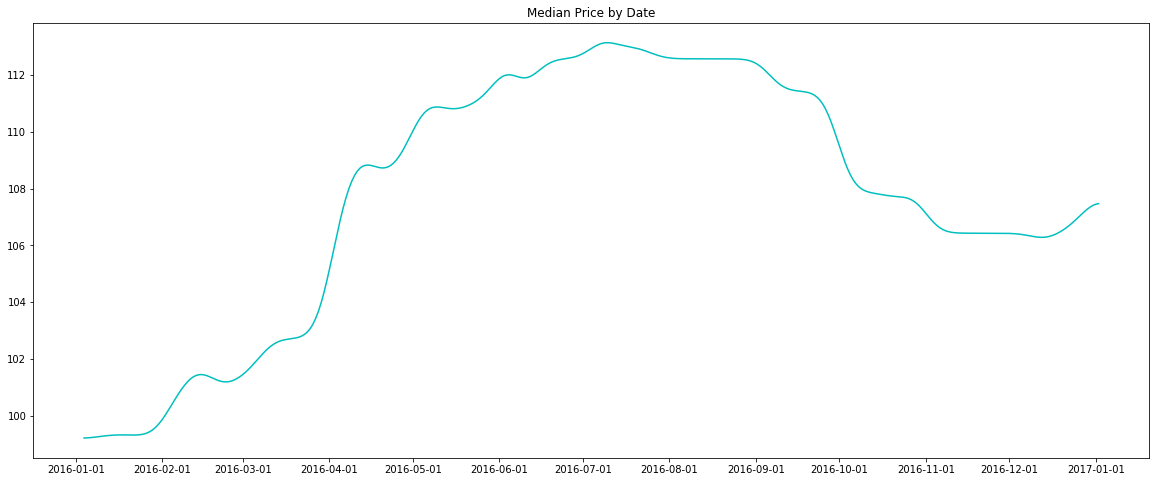

In [19]:
timeplot(pri_median, 'price', 'Median Price by Date')

Obviously, the rental price are higher from May to September. In that time, Seattle usually have nice weather. It makes sense that rental price in Rainy Day is cheaper.

In addition, the cheapest price is in in January 2016. It could be a reason for high occupancy, but I don't think it is enough to explain 50% occupancy rate in January.

#### Mean of Price

I belieave the median of price shows the pattern of price better than mean, but it is ok to take a look at the mean.

In [20]:
pri_mean = cal[['date', 'price']].groupby('date').mean()

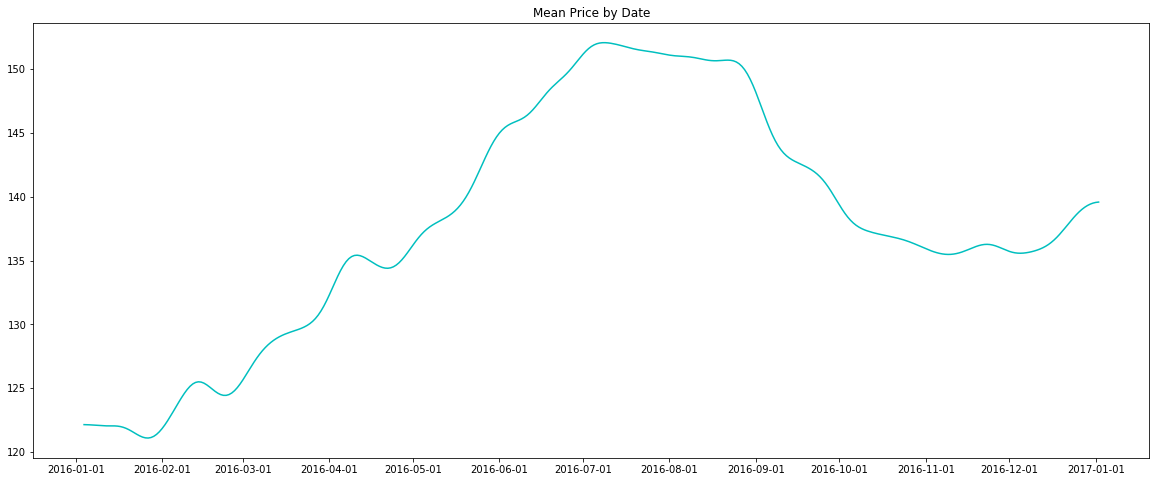

In [21]:
timeplot(pri_mean, 'price', 'Mean Price by Date')

It looks likes a little bit diffrence, but it still shows the same pattern.

## Popular Airbnb Homes